# Data Scientist Position at Network Rail 
## Task based on a hypothetical scenario: Analysis of Airline incidents caused by birds 
As a Data Science consultant working for "Network Airlines", you have been asked to help the team with the analysis of the incident data. The dataset contains records of aircraft incidents caused by wild birds. 

Your task is to explain the data selection and analysis approach you have taken in the process of developing a machine learning model to predict a collision ("INDICATED_DAMAGE" column) using either logistic or linear regression. The selection of the regression and attributes is yours.

We would like to know the accuracy results of your model, preferably through a confusion matrix you have generated from your model, and how it can be used to avoid future incidents for the airline.

## Tips for you 
- No deep learning is required for the completion of this task.
- You can use any python libraries you like.
- There is no single correct solution.
- Hopefully it shouldn't take too long to complete the task but if it becomes an issue, please let us know. 

## Submission Instructions 
Send to your recruiter: 
1. Python Notebook file (`*.ipynb`) with the code used to develop the model and the analysis task.
2. Python (>=3.6) Requirements file (`requirements.txt`) so that we can replicate your notebook runs. (you can use `pip freeze > requirements.txt` to generate this file) 
3. PowerPoint/other presentation (`*.pdf`). 

## Data 
You will only work with a single CSV file (`strike_reports.csv`) and the accompanying metadata description (`column_description.csv`).

## Questions?

Please let us know if you need any further clarification.

## TODO
Feel free to install any libraries you need, add more cells to the notebook, etc.

# Exploratory data analysis

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Set path to the dataset, load dataset, open as a data frame and display.

In [2]:
path = r'C:/Users/Jared/Dropbox/WORK/NR/strike_reports_origin.csv'
data = pd.read_csv(path, low_memory=False)

In [3]:
df = pd.DataFrame(data)
df

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,...,ENROUTE_STATE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
0,608274,15/10/1990,10,1990,NaN,Night,KMIE,DELAWARE COUNTY REGIONAL ARPT,40.24235,-85.39586,...,NaN,NaN,NaN,OPER = CHARLES WEATHERLY /Legacy Record=100033/,REDACTED,REDACTED,FAA Form 5200-7,Tower,04/12/1998,False
1,608275,01/08/1993,8,1993,NaN,Day,KMSY,LOUIE ARMSTRONG NEW ORLEANS INTL ARPT,29.99339,-90.25803,...,NaN,NaN,NaN,/Legacy Record=100034/,REDACTED,REDACTED,AC Incident Rept,Tower,24/05/2005,False
2,608276,18/08/1996,8,1996,NaN,NaN,KORD,CHICAGO O'HARE INTL ARPT,41.97960,-87.90446,...,NaN,NaN,NaN,/Legacy Record=100035/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,20/12/2007,False
3,608277,19/09/1993,9,1993,NaN,Day,KMHT,MANCHESTER AIRPORT,42.93452,-71.43706,...,NaN,NaN,NaN,SOURCE = 5200-7 & NON-COM INCIDENT REPT.OPERAT...,REDACTED,REDACTED,Multiple,Tower,11/05/1998,False
4,608278,23/03/1991,3,1991,NaN,Night,KELP,EL PASO INTL ARPT,31.80667,-106.37781,...,NaN,NaN,NaN,/Legacy Record=100037/,REDACTED,REDACTED,FAA Form 5200-7,Pilot,28/05/1998,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255924,1163538,03/11/2021,11,2021,11:20,Day,KORD,CHICAGO O'HARE INTL ARPT,41.97960,-87.90446,...,NaN,NaN,NaN,SI ID,REDACTED,REDACTED,FAA Form 5200-7-E,NaN,12/11/2021,False
255925,1163539,01/11/2021,11,2021,08:25,NaN,ZZZZ,UNKNOWN,NaN,NaN,...,NaN,NaN,NaN,SI ID,REDACTED,REDACTED,FAA Form 5200-7-E,Airport Operations,12/11/2021,False
255926,1163540,01/11/2021,11,2021,00:00,NaN,KAUS,AUSTIN-BERGSTROM INTL,30.19453,-97.66987,...,NaN,NaN,NaN,SI ID,REDACTED,REDACTED,FAA Form 5200-7-E,Airport Operations,12/11/2021,False
255927,1163541,03/11/2021,11,2021,15:40,NaN,KPWM,PORTLAND INTL JETPORT (ME),43.64617,-70.30875,...,NaN,NaN,NaN,SI ID,REDACTED,REDACTED,FAA Form 5200-7-E,Carcass Found,12/11/2021,False


As per above window, dataset has 255929 rows × 100 columns.
Let's check column names, before moving to further steps.

In [4]:
df.columns

Index(['INDEX_NR', 'INCIDENT_DATE', 'INCIDENT_MONTH', 'INCIDENT_YEAR', 'TIME',
       'TIME_OF_DAY', 'AIRPORT_ID', 'AIRPORT', 'LATITUDE', 'LONGITUDE',
       'RUNWAY', 'STATE', 'FAAREGION', 'LOCATION', 'OPID', 'OPERATOR', 'REG',
       'FLT', 'AIRCRAFT', 'AMA', 'AMO', 'EMA', 'EMO', 'AC_CLASS', 'AC_MASS',
       'TYPE_ENG', 'NUM_ENGS', 'ENG_1_POS', 'ENG_2_POS', 'ENG_3_POS',
       'ENG_4_POS', 'PHASE_OF_FLIGHT', 'HEIGHT', 'SPEED', 'DISTANCE', 'SKY',
       'PRECIPITATION', 'AOS', 'COST_REPAIRS', 'COST_OTHER',
       'COST_REPAIRS_INFL_ADJ', 'COST_OTHER_INFL_ADJ', 'INGESTED',
       'INDICATED_DAMAGE', 'DAMAGE_LEVEL', 'STR_RAD', 'DAM_RAD',
       'STR_WINDSHLD', 'DAM_WINDSHLD', 'STR_NOSE', 'DAM_NOSE', 'STR_ENG1',
       'DAM_ENG1', 'ING_ENG1', 'STR_ENG2', 'DAM_ENG2', 'ING_ENG2', 'STR_ENG3',
       'DAM_ENG3', 'ING_ENG3', 'STR_ENG4', 'DAM_ENG4', 'ING_ENG4', 'STR_PROP',
       'DAM_PROP', 'STR_WING_ROT', 'DAM_WING_ROT', 'STR_FUSE', 'DAM_FUSE',
       'STR_LG', 'DAM_LG', 'STR_TAIL', 'DAM_TA

Some column names vary from official names used in metadata file, such as NUM_SEEN(BIRDS_SEEN), NUM_STRUCK(BIRDS_STRUCK) etc.

Now, I analyse type of feature data in columns and display all results.

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255929 entries, 0 to 255928
Data columns (total 100 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   INDEX_NR               255929 non-null  int64  
 1   INCIDENT_DATE          255929 non-null  object 
 2   INCIDENT_MONTH         255929 non-null  int64  
 3   INCIDENT_YEAR          255929 non-null  int64  
 4   TIME                   134887 non-null  object 
 5   TIME_OF_DAY            149502 non-null  object 
 6   AIRPORT_ID             255929 non-null  object 
 7   AIRPORT                255929 non-null  object 
 8   LATITUDE               224685 non-null  float64
 9   LONGITUDE              224685 non-null  float64
 10  RUNWAY                 193572 non-null  object 
 11  STATE                  224685 non-null  object 
 12  FAAREGION              224685 non-null  object 
 13  LOCATION               29779 non-null   object 
 14  OPID                   255920 non-n

In [6]:
# Drop NULLs across the dataset (subset=['ENG_4_POS'])
dfn = df.dropna(subset=['ENG_1_POS'])
dfn

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,...,ENROUTE_STATE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
0,608274,15/10/1990,10,1990,NaN,Night,KMIE,DELAWARE COUNTY REGIONAL ARPT,40.24235,-85.39586,...,NaN,NaN,NaN,OPER = CHARLES WEATHERLY /Legacy Record=100033/,REDACTED,REDACTED,FAA Form 5200-7,Tower,04/12/1998,False
1,608275,01/08/1993,8,1993,NaN,Day,KMSY,LOUIE ARMSTRONG NEW ORLEANS INTL ARPT,29.99339,-90.25803,...,NaN,NaN,NaN,/Legacy Record=100034/,REDACTED,REDACTED,AC Incident Rept,Tower,24/05/2005,False
2,608276,18/08/1996,8,1996,NaN,NaN,KORD,CHICAGO O'HARE INTL ARPT,41.97960,-87.90446,...,NaN,NaN,NaN,/Legacy Record=100035/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,20/12/2007,False
3,608277,19/09/1993,9,1993,NaN,Day,KMHT,MANCHESTER AIRPORT,42.93452,-71.43706,...,NaN,NaN,NaN,SOURCE = 5200-7 & NON-COM INCIDENT REPT.OPERAT...,REDACTED,REDACTED,Multiple,Tower,11/05/1998,False
4,608278,23/03/1991,3,1991,NaN,Night,KELP,EL PASO INTL ARPT,31.80667,-106.37781,...,NaN,NaN,NaN,/Legacy Record=100037/,REDACTED,REDACTED,FAA Form 5200-7,Pilot,28/05/1998,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255922,1163536,03/06/2021,6,2021,10:43,NaN,KSEE,GILLESPIE FIELD ARPT,32.82623,-116.97245,...,NaN,NaN,NaN,NaN,REDACTED,REDACTED,MOR,Tower,12/11/2021,False
255923,1163537,31/10/2021,10,2021,16:17,Day,KABE,LEHIGH VALLEY INTL,40.65236,-75.44040,...,NaN,NaN,NaN,SI ID,REDACTED,REDACTED,FAA Form 5200-7-E,Airport Operations,12/11/2021,False
255924,1163538,03/11/2021,11,2021,11:20,Day,KORD,CHICAGO O'HARE INTL ARPT,41.97960,-87.90446,...,NaN,NaN,NaN,SI ID,REDACTED,REDACTED,FAA Form 5200-7-E,NaN,12/11/2021,False
255925,1163539,01/11/2021,11,2021,08:25,NaN,ZZZZ,UNKNOWN,NaN,NaN,...,NaN,NaN,NaN,SI ID,REDACTED,REDACTED,FAA Form 5200-7-E,Airport Operations,12/11/2021,False


Quick look on numerical columns characteristics.

In [7]:
dfn.describe()

,INDEX_NR,INCIDENT_MONTH,INCIDENT_YEAR,LATITUDE,LONGITUDE,EMA,AC_MASS,NUM_ENGS,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,HEIGHT,SPEED,DISTANCE,AOS,BIRD_BAND_NUMBER,NR_INJURIES,NR_FATALITIES
count,1.840890e+05,184089.000000,184089.000000,153758.000000,153758.000000,167879.000000,184024.000000,184058.000000,184089.000000,171958.000000,12612.000000,3053.000000,133368.000000,86257.000000,93715.000000,12251.000000,1.700000e+01,223.000000,14.000000
mean,7.702859e+05,7.246479,2009.515490,36.666375,-90.742416,20.080737,3.528964,2.023922,2.873909,2.746153,2.944814,1.864723,867.454457,142.745377,1.367254,91.394800,1.593698e+08,1.309417,2.500000
std,1.442387e+05,2.813869,8.273028,7.130830,26.864389,10.804847,0.876492,0.422965,2.109520,1.993217,1.961035,1.366747,1849.226116,46.317436,4.569620,402.829299,5.242106e+07,0.815531,2.028641
min,6.082410e+05,1.000000,1990.000000,-37.673333,-177.381000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000,1.000000
25%,6.666320e+05,5.000000,2003.000000,32.987640,-98.469780,10.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,120.000000,0.000000,1.000000,1.266043e+08,1.000000,1.000000
50%,7.314860e+05,8.000000,2011.000000,38.661870,-87.896580,22.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,50.000000,140.000000,0.000000,3.000000,1.893087e+08,1.000000,2.000000
75%,8.054300e+05,9.000000,2017.000000,40.788390,-80.232870,31.000000,4.000000,2.000000,5.000000,5.000000,5.000000,4.000000,800.000000,160.000000,0.000000,24.000000,1.947390e+08,1.000000,3.000000
max,1.163540e+06,12.000000,2021.000000,71.285450,178.559228,92.000000,5.000000,4.000000,7.000000,7.000000,6.000000,5.000000,31300.000000,1250.000000,99.000000,8938.000000,1.967166e+08,7.000000,8.000000


Standard deviations can be explained as really low in most cases, which can means that linear regression will not be the best way to do this task.

Comparing mean values distribution between False and True for INDICATED_DAMAGE column, to better understand relations.

In [8]:
# Setting visibility options for all columns in JN
pd.set_option("display.max_columns", None)
# Checking mean values across numerical attributes
dfn.groupby('INDICATED_DAMAGE').mean()

,INDEX_NR,INCIDENT_MONTH,INCIDENT_YEAR,LATITUDE,LONGITUDE,EMA,AC_MASS,NUM_ENGS,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,HEIGHT,SPEED,DISTANCE,AOS,INGESTED,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,BIRD_BAND_NUMBER,REMAINS_COLLECTED,REMAINS_SENT,NR_INJURIES,NR_FATALITIES,TRANSFER
INDICATED_DAMAGE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,773197.732692,7.263637,2009.868738,36.595317,-90.707962,20.104916,3.584535,2.035422,2.795815,2.725958,2.963044,1.928994,811.082861,142.790263,1.278205,15.201511,0.042050,0.131039,0.000000,0.179915,0.000000,0.164885,0.000000,0.053505,0.000000,0.000873,0.045096,0.000000,0.000993,0.001643,0.000000,0.000000,0.000801,0.000000,0.0,0.020357,0.000000,0.141362,0.000000,0.129185,0.000000,0.054534,0.000000,0.009023,0.000000,0.002251,0.000000,0.172656,0.000000,1.619716e+08,0.315342,0.159299,1.857143,NaN,0.0
True,743343.495238,7.087719,2006.246951,37.353050,-91.075362,19.862559,3.014656,1.917484,3.596491,2.963655,2.774590,1.550193,1360.455681,142.412980,2.355429,194.675457,0.239265,0.126427,0.105207,0.103537,0.066778,0.114731,0.080033,0.183626,0.155778,0.002061,0.149151,0.129212,0.002562,0.009969,0.008967,0.000056,0.004678,0.003732,0.0,0.054080,0.033807,0.339348,0.296296,0.093010,0.057533,0.092843,0.064829,0.060540,0.049735,0.051518,0.050014,0.123642,0.117627,1.177411e+08,0.270844,0.183459,1.291667,2.5,0.0


All integer and float numbers can be potentially used for linear regression, hence I will select them for the correlation process. During this stage I will use only columns which data is obtained before the potential strike.

In [9]:
df1 = dfn[['INDICATED_DAMAGE', 'INCIDENT_MONTH', 'INCIDENT_YEAR',
           'LATITUDE', 'LONGITUDE', 'EMA', 'AC_MASS', 'NUM_ENGS',
           'ENG_1_POS', 'ENG_2_POS', 'ENG_3_POS', 'ENG_4_POS', 'HEIGHT',
           'SPEED', 'DISTANCE']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184089 entries, 0 to 255926
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   INDICATED_DAMAGE  184089 non-null  bool   
 1   INCIDENT_MONTH    184089 non-null  int64  
 2   INCIDENT_YEAR     184089 non-null  int64  
 3   LATITUDE          153758 non-null  float64
 4   LONGITUDE         153758 non-null  float64
 5   EMA               167879 non-null  float64
 6   AC_MASS           184024 non-null  float64
 7   NUM_ENGS          184058 non-null  float64
 8   ENG_1_POS         184089 non-null  float64
 9   ENG_2_POS         171958 non-null  float64
 10  ENG_3_POS         12612 non-null   float64
 11  ENG_4_POS         3053 non-null    float64
 12  HEIGHT            133368 non-null  float64
 13  SPEED             86257 non-null   float64
 14  DISTANCE          93715 non-null   float64
dtypes: bool(1), float64(12), int64(2)
memory usage: 21.2 MB


In [10]:
df1.groupby(["INDICATED_DAMAGE"]).count()

,INCIDENT_MONTH,INCIDENT_YEAR,LATITUDE,LONGITUDE,EMA,AC_MASS,NUM_ENGS,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,HEIGHT,SPEED,DISTANCE
INDICATED_DAMAGE,,,,,,,,,,,,,,
False,166134,166134,139339,139339,151130,166079,166110,166134,157348,11392,2535,119683,75995,85968
True,17955,17955,14419,14419,16749,17945,17948,17955,14610,1220,518,13685,10262,7747


In [11]:
# Check unique values across the dataset, to see how complex the distribution is.
df1.nunique()

INDICATED_DAMAGE       2
INCIDENT_MONTH        12
INCIDENT_YEAR         32
LATITUDE            2415
LONGITUDE           2416
EMA                   35
AC_MASS                5
NUM_ENGS               4
ENG_1_POS              7
ENG_2_POS              7
ENG_3_POS              5
ENG_4_POS              4
HEIGHT               660
SPEED                279
DISTANCE             189
dtype: int64

In [12]:
dff = df1.dropna() 
dff

,INDICATED_DAMAGE,INCIDENT_MONTH,INCIDENT_YEAR,LATITUDE,LONGITUDE,EMA,AC_MASS,NUM_ENGS,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,HEIGHT,SPEED,DISTANCE
459,False,6,1990,37.61900,-122.37484,10.0,4.0,4.0,1.0,1.0,1.0,4.0,0.0,140.0,0.0
740,False,7,1990,40.63975,-73.77893,34.0,5.0,4.0,1.0,1.0,1.0,1.0,0.0,120.0,0.0
844,False,9,1993,38.17439,-85.73600,10.0,4.0,4.0,1.0,1.0,1.0,1.0,0.0,110.0,0.0
1172,True,5,1991,40.69250,-74.16866,10.0,4.0,4.0,1.0,1.0,1.0,4.0,0.0,100.0,0.0
1646,False,10,1991,37.61900,-122.37484,34.0,5.0,4.0,1.0,1.0,1.0,1.0,0.0,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244325,True,1,2000,32.89595,-97.03720,10.0,4.0,4.0,1.0,1.0,1.0,4.0,20.0,150.0,0.0
244960,False,4,2021,46.91631,-114.09056,7.0,4.0,4.0,1.0,1.0,1.0,1.0,5000.0,240.0,8.0
245441,False,5,2021,38.17439,-85.73600,22.0,5.0,4.0,4.0,4.0,4.0,4.0,200.0,165.0,1.0
248398,False,8,2021,39.81376,-82.92786,22.0,5.0,4.0,4.0,4.0,4.0,4.0,0.0,180.0,0.0


### At the first I analyse relationship between numerical variables.

Initial pairplot to find potential best line of fit for linear regression.

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


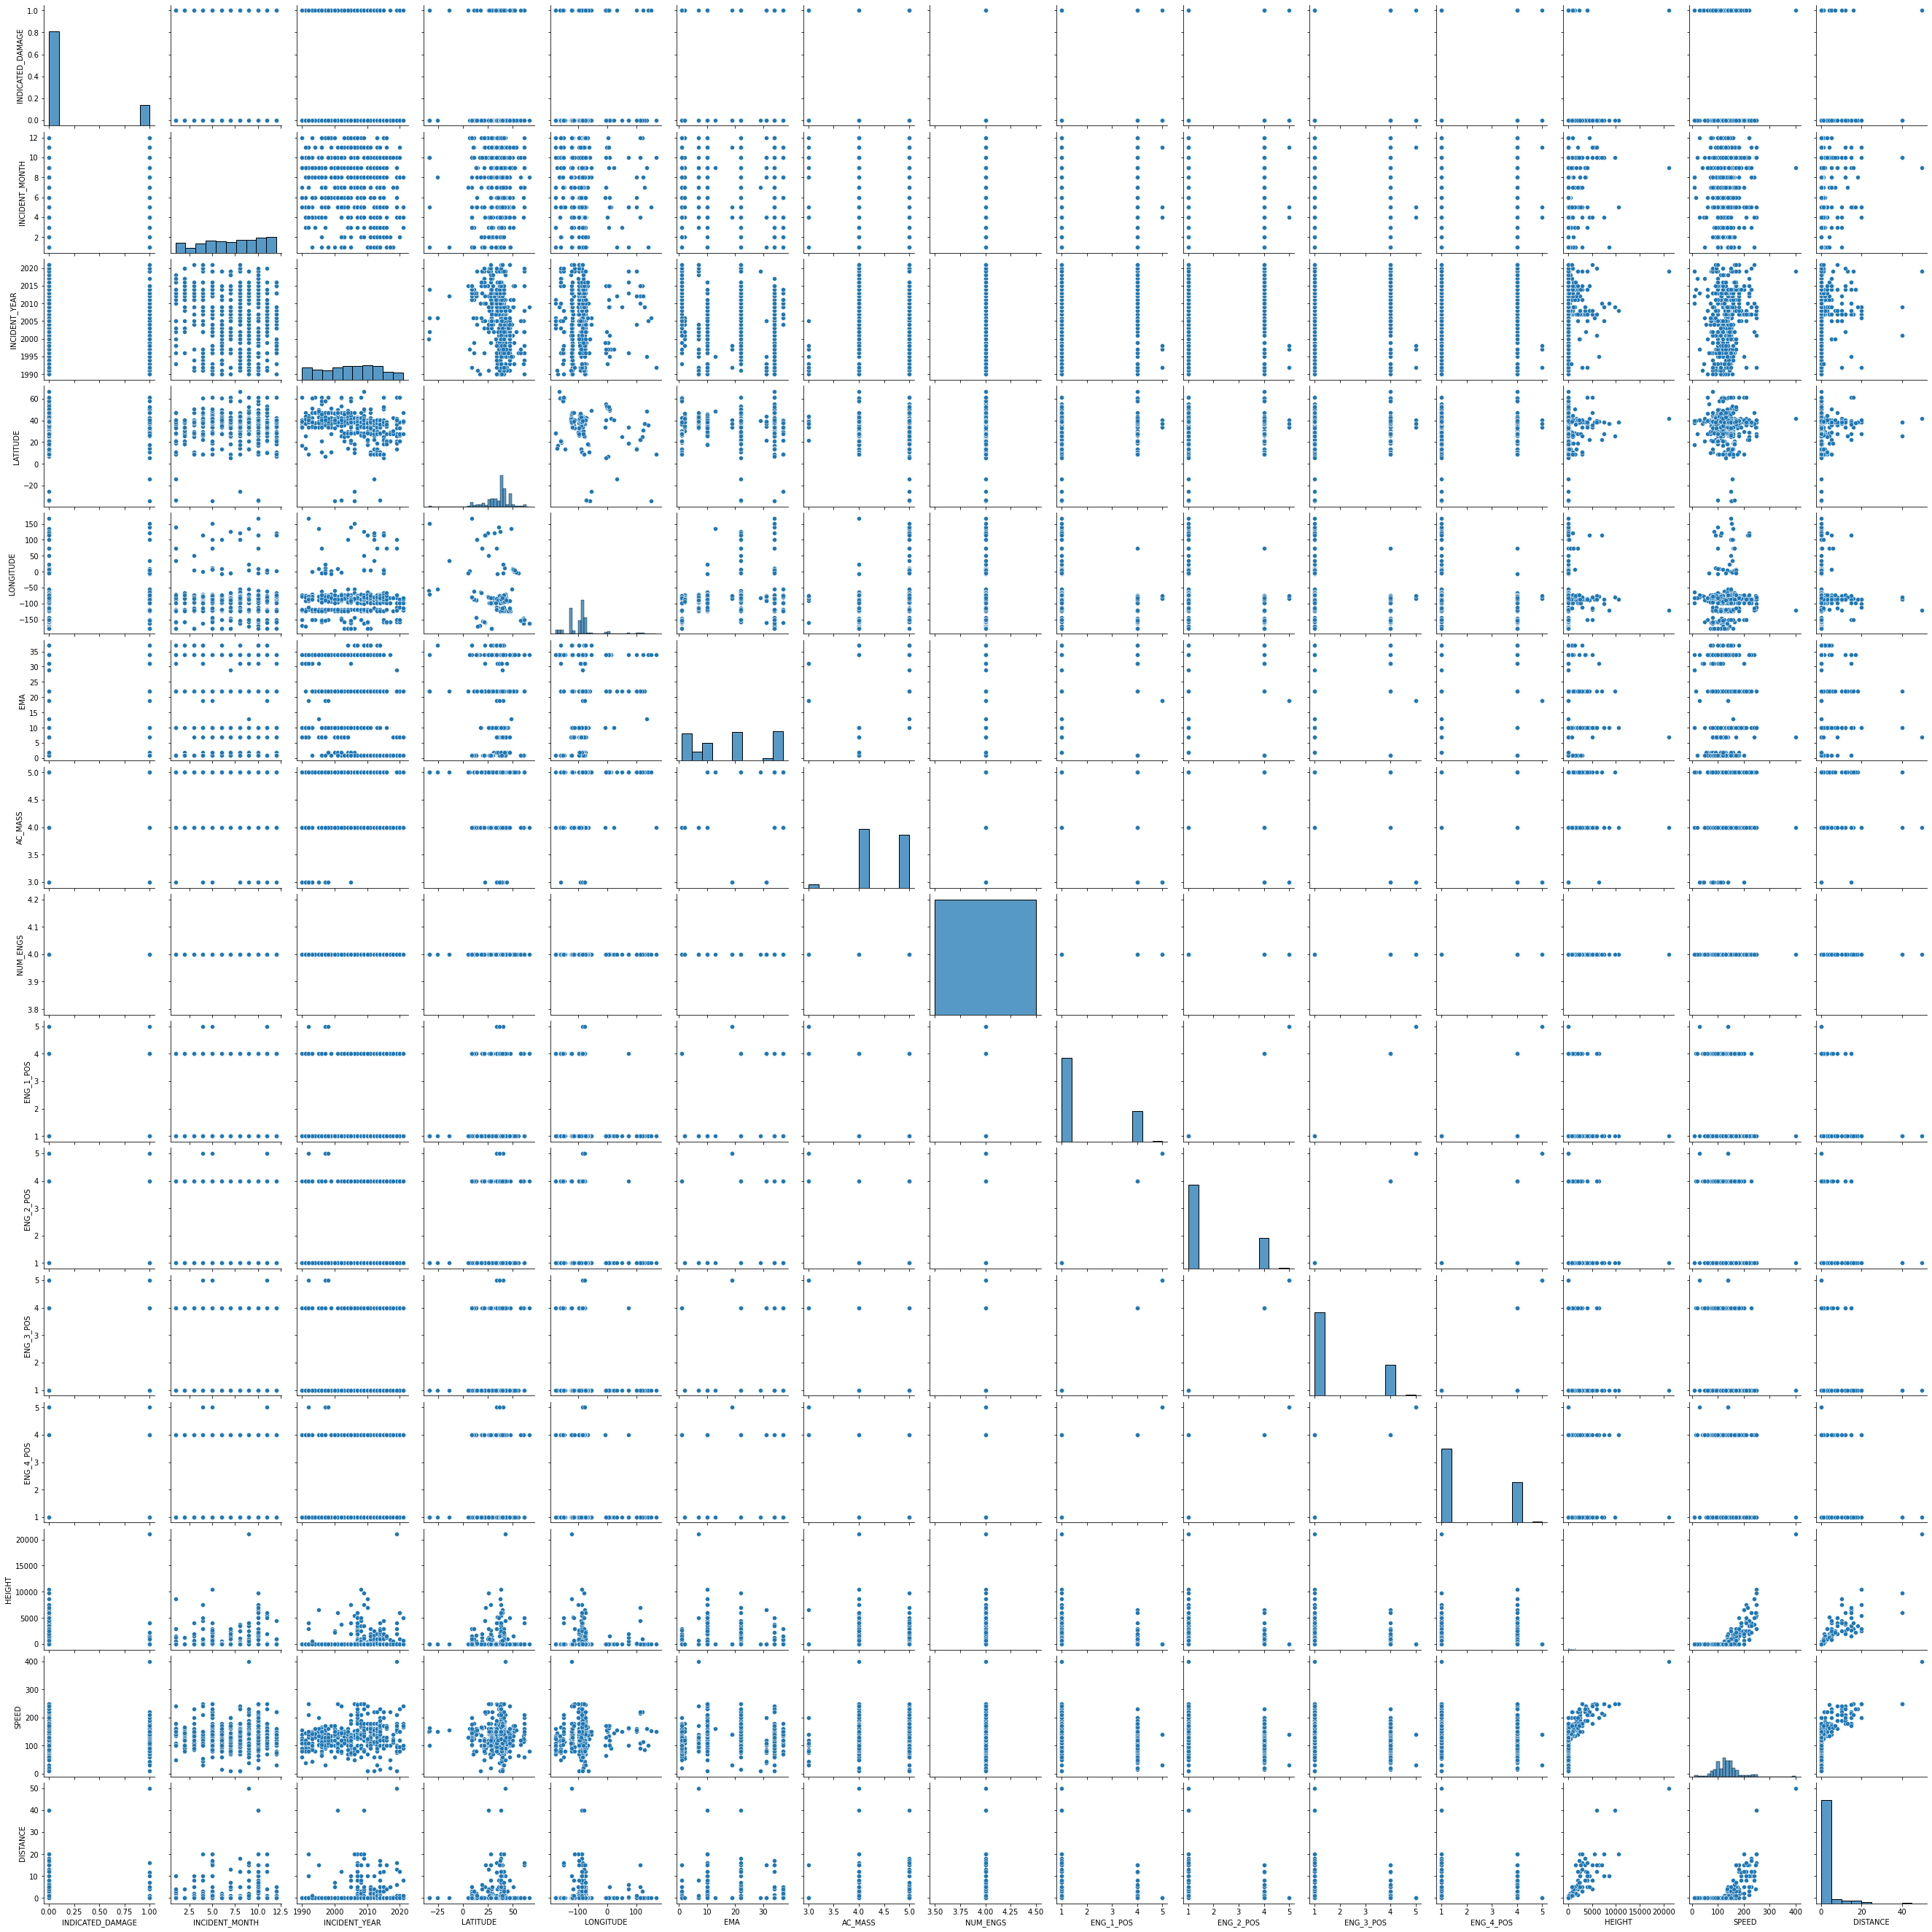

In [13]:
sns.pairplot(data=dff) # For more details, open plot in new tab!

Not the greatest results of this step, however data distribution is balanced.

At this stage all numbers must be standardised to make correlation process valid.

In [14]:
dfs = pd.DataFrame(MinMaxScaler().fit_transform(dff))

Correlation data will be calculated by pearson method for distances between attributes.

In [15]:
kor = dfs.corr(method ='pearson')

Plot results below as a correlation heatmap.

Text(0.5, 1.0, 'Correlation heatmap for numerical attributes')

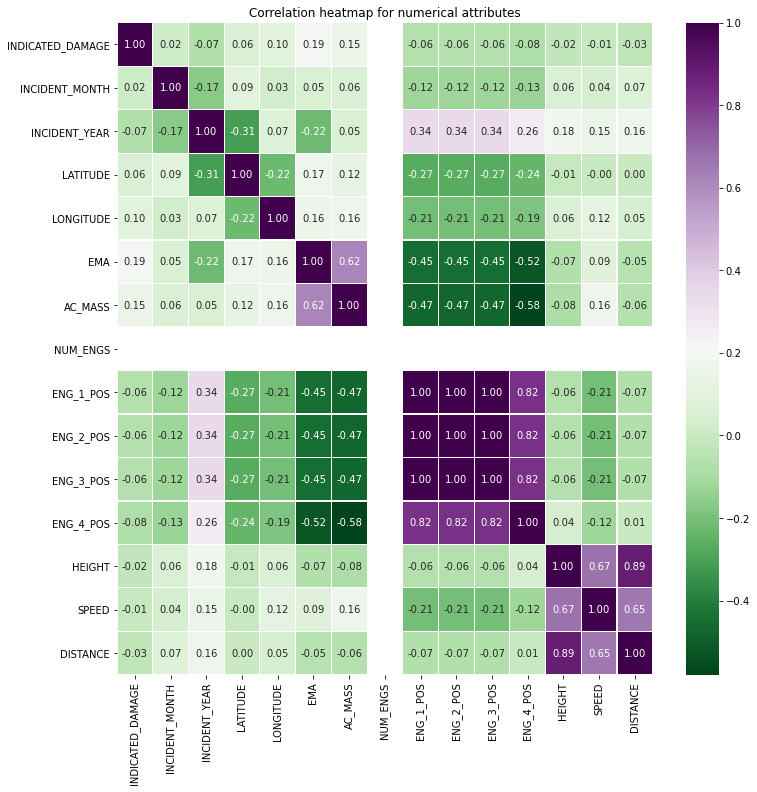

In [16]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(kor, xticklabels=df1.columns, yticklabels=df1.columns,
            annot=True, fmt='.2f', linewidths=.1,
            cmap="PRGn_r").set_title('Correlation heatmap for numerical attributes')

In the above case, I analyse the first column (Indicated_Damage). In this situation for none of these values correlations are significant, hence linear regression it not the best option to perform.

### At the second, I analyse and visualise data on a monthly basis.

In [40]:
# Selecting every true case (True case means that indicated_damage has happened(is True))
df0 = df.loc[df['INDICATED_DAMAGE'] == 1]

In [41]:
# Grouping true collisions montly
dfm = df0.groupby(["INCIDENT_MONTH"]).count().iloc[:,0]
dfm = dfm.rename("true_cases")

In [42]:
# Grouping all collisions montly
dfmall = df.groupby(["INCIDENT_MONTH"]).count().iloc[:,0]
dfmall = dfmall.rename("all_cases")

In [43]:
# Creating table with all cases
dmfinal = pd.concat([dfm, dfmall], axis=1, join="inner")
# Calculating how many true cases are in all cases, in percentage
dmfinal['mean'] = (dmfinal.iloc[:,0]/dmfinal.iloc[:,1])*100
dmfinal

,true_cases,all_cases,mean
INCIDENT_MONTH,,,
1,1008,8470,11.900826
2,928,8136,11.406096
3,1621,12415,13.056786
4,1616,18015,8.970303
5,1402,24933,5.623070
6,1075,21064,5.103494
7,1297,32532,3.986844
8,1742,36129,4.821611
9,2043,34486,5.924143


Based on above data I can say that total number of true cases is between approx. 900 and 2500, while total number of collisions is between 8000 and 36000. I visualise everything on the below chart.

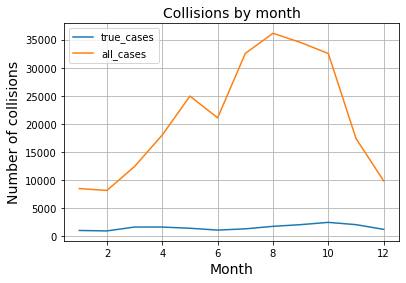

In [44]:
# Plotting collisions and all cases simultaneously.
dmfinal.plot(y=["true_cases","all_cases"], use_index=True)
plt.title('Collisions by month', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of collisions', fontsize=14)
plt.grid(True)
plt.show()

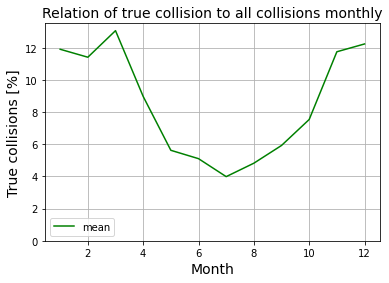

In [45]:
# Plotting average number of true_cases in relation to all cases
dmfinal.plot(y=["mean"], color='green', use_index=True)
plt.title('Relation of true collision to all collisions monthly', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('True collisions [%]', fontsize=14)
plt.grid(True)
plt.ylim(ymin=0) # to show full range of values
plt.show()

Based on this chart I can say that likelihood of true case during summer is approximately 3x smaller than during winter.

### At the last I analyse data on an annual basis.

In [46]:
# Selecting every true case and group them annually
dfy = df0.groupby(["INCIDENT_YEAR"]).count().iloc[:,0]
dfy = dfy.rename("true_cases")

In [47]:
# Grouping all collisions annually 
dfyall = df.groupby(["INCIDENT_YEAR"]).count().iloc[:,0]
dfyall = dfyall.rename("all_cases")

In [48]:
# Creating table with all cases
dyfinal = pd.concat([dfy, dfyall], axis=1, join="inner")
# Calculating how many true cases are in all cases, in percentage
dyfinal['mean'] = (dyfinal.iloc[:,0]/dyfinal.iloc[:,1])*100
dyfinal

,true_cases,all_cases,mean
INCIDENT_YEAR,,,
1990,371,1848,20.075758
1991,400,2389,16.743407
1992,365,2567,14.218933
1993,399,2575,15.495146
1994,459,2634,17.425968
1995,498,2769,17.984832
1996,503,2936,17.132153
1997,577,3454,16.705269
1998,587,3802,15.439243


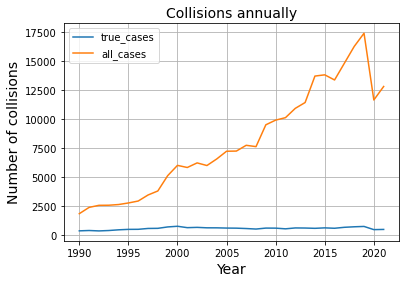

In [49]:
# Plotting collisions and all cases simultaneously.
dyfinal.plot(y=["true_cases","all_cases"], use_index=True)
plt.title('Collisions annually', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of collisions', fontsize=14)
plt.grid(True)
plt.show()

When true cases on an annual basis are mostly between 300 and 800, all cases are growing significantly. Trend for all cases broke in 2020 due to pandemic and in 2021 due to incomplete data coverage across the year (last few weeks missing).

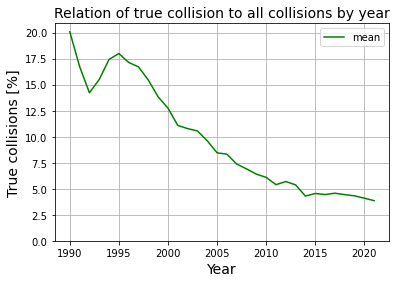

In [50]:
# Plotting average number of true_cases in relation to all cases
dyfinal.plot(y=["mean"], color='green', use_index=True)
plt.title('Relation of true collision to all collisions by year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('True collisions [%]', fontsize=14)
plt.grid(True)
plt.ylim(ymin=0) # to show full range of values
plt.show()

Definite smooting of relation between true and all cases. 30 years ago 20% of cases meant that airplane was damaged, this value dropped x4 since then.

### Now, I analyse non-numerical attributes.

In [17]:
dc = df[['INDICATED_DAMAGE', 'INCIDENT_YEAR', 'TIME_OF_DAY', 'SKY',
         'PRECIPITATION', 'FAAREGION', 'PHASE_OF_FLIGHT', 'WARNED', 'EMA',
         'EMO', 'AC_CLASS', 'AC_MASS']]
# Checking number of unique values per attribute.
dc.nunique()

INDICATED_DAMAGE     2
INCIDENT_YEAR       32
TIME_OF_DAY          4
SKY                  3
PRECIPITATION       12
FAAREGION           10
PHASE_OF_FLIGHT     12
WARNED               3
EMA                 37
EMO                 73
AC_CLASS             5
AC_MASS              5
dtype: int64

Selecting features for further checks.

In [18]:
# At the first create dataframe for further analysis
dcp = dc.dropna(subset=['PHASE_OF_FLIGHT'])
# Create another with no null values for any column
dcc = dc.dropna()
dcc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97784 entries, 0 to 255924
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INDICATED_DAMAGE  97784 non-null  bool   
 1   INCIDENT_YEAR     97784 non-null  int64  
 2   TIME_OF_DAY       97784 non-null  object 
 3   SKY               97784 non-null  object 
 4   PRECIPITATION     97784 non-null  object 
 5   FAAREGION         97784 non-null  object 
 6   PHASE_OF_FLIGHT   97784 non-null  object 
 7   WARNED            97784 non-null  object 
 8   EMA               97784 non-null  float64
 9   EMO               97784 non-null  object 
 10  AC_CLASS          97784 non-null  object 
 11  AC_MASS           97784 non-null  float64
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 9.0+ MB


In [19]:
dcc.nunique()

INDICATED_DAMAGE     2
INCIDENT_YEAR       32
TIME_OF_DAY          4
SKY                  3
PRECIPITATION       11
FAAREGION           10
PHASE_OF_FLIGHT     10
WARNED               3
EMA                 27
EMO                 56
AC_CLASS             2
AC_MASS              5
dtype: int64

In [20]:
dnc = pd.get_dummies(dcc,
    columns =['INDICATED_DAMAGE', 'INCIDENT_YEAR', 'EMA', 'EMO',
              'TIME_OF_DAY', 'SKY', 'PRECIPITATION', 'FAAREGION',
              'PHASE_OF_FLIGHT', 'WARNED', 'AC_CLASS', 'AC_MASS'])
dnc.columns

Index(['INDICATED_DAMAGE_False', 'INDICATED_DAMAGE_True', 'INCIDENT_YEAR_1990',
       'INCIDENT_YEAR_1991', 'INCIDENT_YEAR_1992', 'INCIDENT_YEAR_1993',
       'INCIDENT_YEAR_1994', 'INCIDENT_YEAR_1995', 'INCIDENT_YEAR_1996',
       'INCIDENT_YEAR_1997',
       ...
       'WARNED_No', 'WARNED_Unknown', 'WARNED_Yes', 'AC_CLASS_A', 'AC_CLASS_B',
       'AC_MASS_1.0', 'AC_MASS_2.0', 'AC_MASS_3.0', 'AC_MASS_4.0',
       'AC_MASS_5.0'],
      dtype='object', length=165)

Visualisation of null values across the dataset.

<AxesSubplot:>

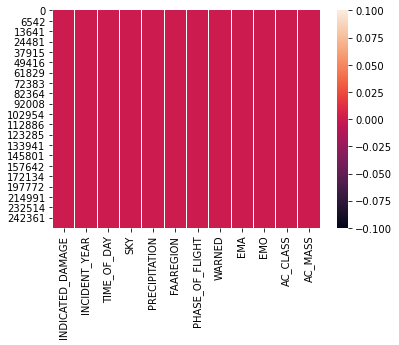

In [21]:
sns.heatmap(dcc.isnull())

Analysis of relation between true and false for Indicated_Damage for phases of flight and precipitation.

<AxesSubplot:xlabel='PHASE_OF_FLIGHT'>

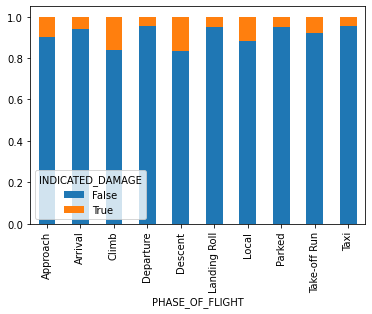

In [22]:
table = pd.crosstab(dcc.PHASE_OF_FLIGHT, dcc.INDICATED_DAMAGE)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='PRECIPITATION'>

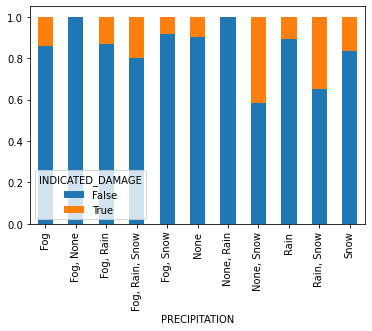

In [23]:
table=pd.crosstab(dcc.PRECIPITATION, dcc.INDICATED_DAMAGE)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

Let's try to do more checks, but for non-numerical values.

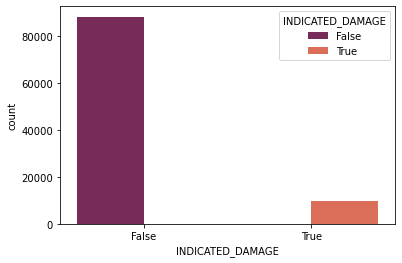

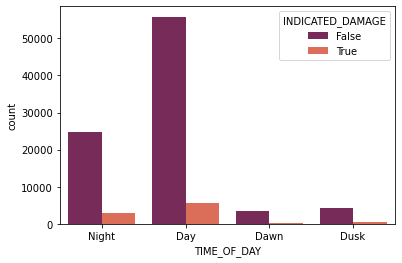

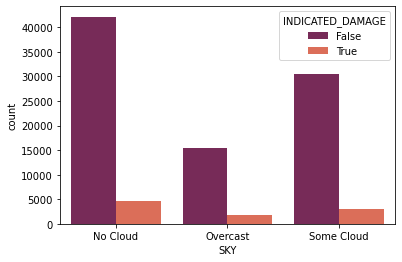

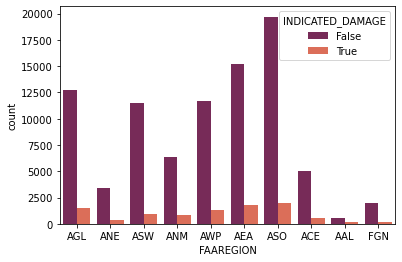

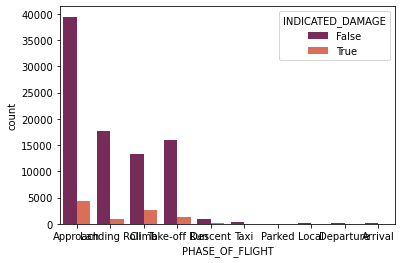

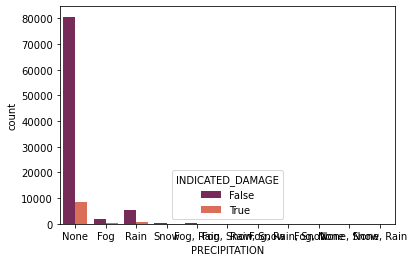

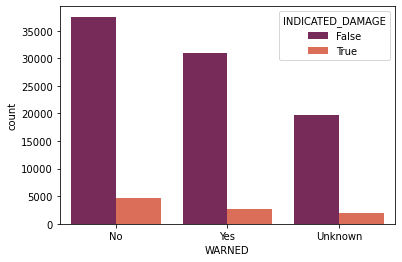

In [26]:
# Another attempt to check relations across dataset 
features = ['INDICATED_DAMAGE', 'TIME_OF_DAY', 'SKY', 'FAAREGION',
            'PHASE_OF_FLIGHT', 'PRECIPITATION', 'WARNED']
for f in features:
    sns.countplot(x = f, data = dcc, palette = 'rocket',
                  hue = 'INDICATED_DAMAGE')
    plt.show()

In most cases the ratio between true and false was similar, this analysis did not prove anything.

# Phase of flight analysis 

Below (attached) image presents phases of flight to visualise progress step by step.

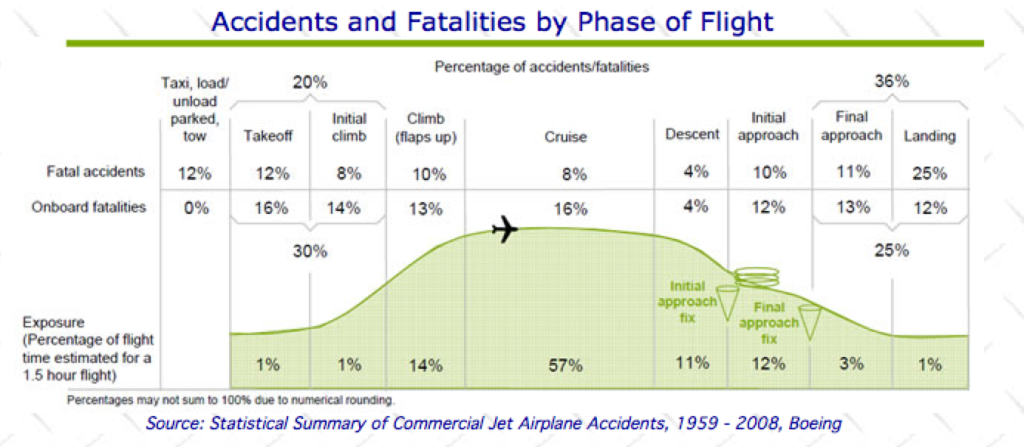

In [19]:
Image("C:/Users/Jared/Dropbox/WORK/NR/accident-by-flight-phase.png")

Below I summarise cases for each stage.

In [89]:
dcp = dcp.loc[dcp['INDICATED_DAMAGE'] == 1]

In [91]:
dp = dcp.groupby(['PHASE_OF_FLIGHT']).size().reset_index(name='counts').sort_values('counts', ascending = False)
dp

,PHASE_OF_FLIGHT,counts
0,Approach,6271
2,Climb,3842
9,Take-off Run,2233
6,Landing Roll,1789
5,En Route,1550
4,Descent,338
3,Departure,73
7,Local,54
10,Taxi,38
1,Arrival,28


Can be observed that the highest number of cases happened when the most factors are changing: height, distance and speed; especially during Approach and Climb phases.
Lower number of cases occur during Take-off run and Landing roll, when speed and height are relatively low (but these values are changing rapidly), in comparison to first 2 cases.
During "En route" stage, when speed and height are constant, number of cases is a way lower than in all 4 cases mentioned previously.
Minimal number of cases were reported for phases Departure, Local, Taxi, Arrival and Parked phases.

# Feature Selection

## Narrowing range of values based on year

In [27]:
dn = dcc[(dcc['INCIDENT_YEAR'] > 2009) & (dcc['INCIDENT_YEAR'] < 2020) ]

In [28]:
dn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43484 entries, 94953 to 255376
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INDICATED_DAMAGE  43484 non-null  bool   
 1   INCIDENT_YEAR     43484 non-null  int64  
 2   TIME_OF_DAY       43484 non-null  object 
 3   SKY               43484 non-null  object 
 4   PRECIPITATION     43484 non-null  object 
 5   FAAREGION         43484 non-null  object 
 6   PHASE_OF_FLIGHT   43484 non-null  object 
 7   WARNED            43484 non-null  object 
 8   EMA               43484 non-null  float64
 9   EMO               43484 non-null  object 
 10  AC_CLASS          43484 non-null  object 
 11  AC_MASS           43484 non-null  float64
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 4.0+ MB


In [29]:
dnc = pd.get_dummies(dn,
            columns =['INDICATED_DAMAGE', 'EMA', 'EMO', 'TIME_OF_DAY',
                      'SKY', 'PRECIPITATION', 'FAAREGION',
                      'PHASE_OF_FLIGHT', 'WARNED', 'AC_CLASS', 'AC_MASS'])
dnc.columns

Index(['INCIDENT_YEAR', 'INDICATED_DAMAGE_False', 'INDICATED_DAMAGE_True',
       'EMA_1.0', 'EMA_2.0', 'EMA_7.0', 'EMA_9.0', 'EMA_10.0', 'EMA_11.0',
       'EMA_13.0',
       ...
       'WARNED_No', 'WARNED_Unknown', 'WARNED_Yes', 'AC_CLASS_A', 'AC_CLASS_B',
       'AC_MASS_1.0', 'AC_MASS_2.0', 'AC_MASS_3.0', 'AC_MASS_4.0',
       'AC_MASS_5.0'],
      dtype='object', length=120)

In [30]:
dnt = dnc.loc[dnc['INDICATED_DAMAGE_True'] == 1]
dnt

,INCIDENT_YEAR,INDICATED_DAMAGE_False,INDICATED_DAMAGE_True,EMA_1.0,EMA_2.0,EMA_7.0,EMA_9.0,EMA_10.0,EMA_11.0,EMA_13.0,EMA_14.0,EMA_18.0,EMA_19.0,EMA_20.0,EMA_22.0,EMA_23.0,EMA_27.0,EMA_29.0,EMA_31.0,EMA_33.0,EMA_34.0,EMA_37.0,EMA_41.0,EMA_43.0,EMA_44.0,EMA_46.0,EMA_47.0,EMO_0,EMO_01,EMO_02,EMO_03,EMO_04,EMO_06,EMO_07,EMO_08,EMO_09,EMO_1,EMO_10,EMO_12,EMO_13,EMO_14,EMO_16,EMO_19,EMO_20,EMO_22,EMO_25,EMO_27,EMO_28,EMO_3,EMO_30,EMO_31,EMO_34,EMO_36,EMO_37,EMO_4,EMO_40,EMO_41,EMO_43,EMO_46,EMO_49,EMO_52,EMO_55,EMO_6,EMO_62,EMO_7,EMO_91,EMO_?,EMO_G-,EMO_N5,EMO_N6,EMO_N9,EMO_n3,TIME_OF_DAY_Dawn,TIME_OF_DAY_Day,TIME_OF_DAY_Dusk,TIME_OF_DAY_Night,SKY_No Cloud,SKY_Overcast,SKY_Some Cloud,PRECIPITATION_Fog,"PRECIPITATION_Fog, None","PRECIPITATION_Fog, Rain","PRECIPITATION_Fog, Rain, Snow","PRECIPITATION_Fog, Snow",PRECIPITATION_None,"PRECIPITATION_None, Rain","PRECIPITATION_None, Snow",PRECIPITATION_Rain,"PRECIPITATION_Rain, Snow",PRECIPITATION_Snow,FAAREGION_AAL,FAAREGION_ACE,FAAREGION_AEA,FAAREGION_AGL,FAAREGION_ANE,FAAREGION_ANM,FAAREGION_ASO,FAAREGION_ASW,FAAREGION_AWP,FAAREGION_FGN,PHASE_OF_FLIGHT_Approach,PHASE_OF_FLIGHT_Arrival,PHASE_OF_FLIGHT_Climb,PHASE_OF_FLIGHT_Departure,PHASE_OF_FLIGHT_Descent,PHASE_OF_FLIGHT_Landing Roll,PHASE_OF_FLIGHT_Local,PHASE_OF_FLIGHT_Parked,PHASE_OF_FLIGHT_Take-off Run,PHASE_OF_FLIGHT_Taxi,WARNED_No,WARNED_Unknown,WARNED_Yes,AC_CLASS_A,AC_CLASS_B,AC_MASS_1.0,AC_MASS_2.0,AC_MASS_3.0,AC_MASS_4.0,AC_MASS_5.0
94965,2010,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
94975,2010,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
95101,2010,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
95678,2010,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
95723,2010,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250086,2019,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
250091,2019,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
250107,2014,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
250525,2015,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

In [31]:
dnf = dnc.loc[dnc['INDICATED_DAMAGE_True'] == 0].sample(n= 3053)
dnf

,INCIDENT_YEAR,INDICATED_DAMAGE_False,INDICATED_DAMAGE_True,EMA_1.0,EMA_2.0,EMA_7.0,EMA_9.0,EMA_10.0,EMA_11.0,EMA_13.0,EMA_14.0,EMA_18.0,EMA_19.0,EMA_20.0,EMA_22.0,EMA_23.0,EMA_27.0,EMA_29.0,EMA_31.0,EMA_33.0,EMA_34.0,EMA_37.0,EMA_41.0,EMA_43.0,EMA_44.0,EMA_46.0,EMA_47.0,EMO_0,EMO_01,EMO_02,EMO_03,EMO_04,EMO_06,EMO_07,EMO_08,EMO_09,EMO_1,EMO_10,EMO_12,EMO_13,EMO_14,EMO_16,EMO_19,EMO_20,EMO_22,EMO_25,EMO_27,EMO_28,EMO_3,EMO_30,EMO_31,EMO_34,EMO_36,EMO_37,EMO_4,EMO_40,EMO_41,EMO_43,EMO_46,EMO_49,EMO_52,EMO_55,EMO_6,EMO_62,EMO_7,EMO_91,EMO_?,EMO_G-,EMO_N5,EMO_N6,EMO_N9,EMO_n3,TIME_OF_DAY_Dawn,TIME_OF_DAY_Day,TIME_OF_DAY_Dusk,TIME_OF_DAY_Night,SKY_No Cloud,SKY_Overcast,SKY_Some Cloud,PRECIPITATION_Fog,"PRECIPITATION_Fog, None","PRECIPITATION_Fog, Rain","PRECIPITATION_Fog, Rain, Snow","PRECIPITATION_Fog, Snow",PRECIPITATION_None,"PRECIPITATION_None, Rain","PRECIPITATION_None, Snow",PRECIPITATION_Rain,"PRECIPITATION_Rain, Snow",PRECIPITATION_Snow,FAAREGION_AAL,FAAREGION_ACE,FAAREGION_AEA,FAAREGION_AGL,FAAREGION_ANE,FAAREGION_ANM,FAAREGION_ASO,FAAREGION_ASW,FAAREGION_AWP,FAAREGION_FGN,PHASE_OF_FLIGHT_Approach,PHASE_OF_FLIGHT_Arrival,PHASE_OF_FLIGHT_Climb,PHASE_OF_FLIGHT_Departure,PHASE_OF_FLIGHT_Descent,PHASE_OF_FLIGHT_Landing Roll,PHASE_OF_FLIGHT_Local,PHASE_OF_FLIGHT_Parked,PHASE_OF_FLIGHT_Take-off Run,PHASE_OF_FLIGHT_Taxi,WARNED_No,WARNED_Unknown,WARNED_Yes,AC_CLASS_A,AC_CLASS_B,AC_MASS_1.0,AC_MASS_2.0,AC_MASS_3.0,AC_MASS_4.0,AC_MASS_5.0
186767,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
123109,2012,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
214339,2019,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
138407,2014,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
161813,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115224,2011,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0
145326,2014,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
202197,2018,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0
166168,2016,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [32]:
dat = dnt.append(dnf)
dat

,INCIDENT_YEAR,INDICATED_DAMAGE_False,INDICATED_DAMAGE_True,EMA_1.0,EMA_2.0,EMA_7.0,EMA_9.0,EMA_10.0,EMA_11.0,EMA_13.0,EMA_14.0,EMA_18.0,EMA_19.0,EMA_20.0,EMA_22.0,EMA_23.0,EMA_27.0,EMA_29.0,EMA_31.0,EMA_33.0,EMA_34.0,EMA_37.0,EMA_41.0,EMA_43.0,EMA_44.0,EMA_46.0,EMA_47.0,EMO_0,EMO_01,EMO_02,EMO_03,EMO_04,EMO_06,EMO_07,EMO_08,EMO_09,EMO_1,EMO_10,EMO_12,EMO_13,EMO_14,EMO_16,EMO_19,EMO_20,EMO_22,EMO_25,EMO_27,EMO_28,EMO_3,EMO_30,EMO_31,EMO_34,EMO_36,EMO_37,EMO_4,EMO_40,EMO_41,EMO_43,EMO_46,EMO_49,EMO_52,EMO_55,EMO_6,EMO_62,EMO_7,EMO_91,EMO_?,EMO_G-,EMO_N5,EMO_N6,EMO_N9,EMO_n3,TIME_OF_DAY_Dawn,TIME_OF_DAY_Day,TIME_OF_DAY_Dusk,TIME_OF_DAY_Night,SKY_No Cloud,SKY_Overcast,SKY_Some Cloud,PRECIPITATION_Fog,"PRECIPITATION_Fog, None","PRECIPITATION_Fog, Rain","PRECIPITATION_Fog, Rain, Snow","PRECIPITATION_Fog, Snow",PRECIPITATION_None,"PRECIPITATION_None, Rain","PRECIPITATION_None, Snow",PRECIPITATION_Rain,"PRECIPITATION_Rain, Snow",PRECIPITATION_Snow,FAAREGION_AAL,FAAREGION_ACE,FAAREGION_AEA,FAAREGION_AGL,FAAREGION_ANE,FAAREGION_ANM,FAAREGION_ASO,FAAREGION_ASW,FAAREGION_AWP,FAAREGION_FGN,PHASE_OF_FLIGHT_Approach,PHASE_OF_FLIGHT_Arrival,PHASE_OF_FLIGHT_Climb,PHASE_OF_FLIGHT_Departure,PHASE_OF_FLIGHT_Descent,PHASE_OF_FLIGHT_Landing Roll,PHASE_OF_FLIGHT_Local,PHASE_OF_FLIGHT_Parked,PHASE_OF_FLIGHT_Take-off Run,PHASE_OF_FLIGHT_Taxi,WARNED_No,WARNED_Unknown,WARNED_Yes,AC_CLASS_A,AC_CLASS_B,AC_MASS_1.0,AC_MASS_2.0,AC_MASS_3.0,AC_MASS_4.0,AC_MASS_5.0
94965,2010,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
94975,2010,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
95101,2010,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
95678,2010,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
95723,2010,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115224,2011,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0
145326,2014,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
202197,2018,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0
166168,2016,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [35]:
X = dat.iloc[:,3:] # Attribute columns
y = dat.iloc[:,2]  # Target column 
print(X,y)

        EMA_1.0  EMA_2.0  EMA_7.0  EMA_9.0  EMA_10.0  EMA_11.0  EMA_13.0  \
94965         0        0        0        0         0         0         0   
94975         0        0        0        0         0         0         0   
95101         0        0        0        0         1         0         0   
95678         0        0        0        0         0         0         0   
95723         0        0        0        0         0         0         0   
...         ...      ...      ...      ...       ...       ...       ...   
115224        0        0        0        0         1         0         0   
145326        0        0        0        0         0         0         0   
202197        0        0        0        0         1         0         0   
166168        0        0        0        0         1         0         0   
111355        0        0        0        0         0         0         0   

        EMA_14.0  EMA_18.0  EMA_19.0  EMA_20.0  EMA_22.0  EMA_23.0  EMA_27.0  \
94965  

Univariate Selection

In [38]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [39]:
# Apply SelectKBest class to extract top 20 best features
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [40]:
# Merging 2 two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  # print 20 best features

                            Specs       Score
112                   AC_MASS_1.0  207.813743
2                         EMA_7.0  160.487562
113                   AC_MASS_2.0  140.284974
99          PHASE_OF_FLIGHT_Climb  126.785479
102  PHASE_OF_FLIGHT_Landing Roll  114.582668
115                   AC_MASS_4.0   98.121571
15                       EMA_31.0   78.477707
9                        EMA_19.0   66.130435
6                        EMA_13.0   63.502242
39                         EMO_19   62.042553
47                         EMO_31   55.395604
4                        EMA_10.0   55.094392
105  PHASE_OF_FLIGHT_Take-off Run   43.654545
11                       EMA_22.0   39.815052
40                         EMO_20   32.400000
38                         EMO_16   27.508772
0                         EMA_1.0   16.043702
22                       EMA_46.0   15.515152
109                    WARNED_Yes   15.227113
17                       EMA_34.0   14.200750


AC_MASS_1 can describes/explains Indicated_Damage attribute in the most efficient way.

Feature Importance

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

[5.82737093e-03 0.00000000e+00 1.39651186e-02 3.46276461e-03
 1.32412857e-02 7.72448603e-04 7.36682366e-03 8.27299100e-06
 0.00000000e+00 1.02846654e-02 0.00000000e+00 1.28510946e-02
 7.74511950e-03 0.00000000e+00 0.00000000e+00 1.54563933e-02
 5.94733194e-05 7.95927768e-03 4.82738189e-03 0.00000000e+00
 9.94688544e-04 0.00000000e+00 2.80309263e-03 0.00000000e+00
 4.97410728e-04 1.63429105e-02 1.14105472e-04 2.27600922e-03
 1.50361102e-02 2.97758733e-03 8.62017406e-03 0.00000000e+00
 0.00000000e+00 3.20556262e-03 1.48208443e-02 1.52228789e-04
 1.57216387e-03 3.01005568e-03 3.55749632e-03 6.06199541e-03
 4.13339920e-03 2.15825851e-03 2.38537562e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.49569857e-03
 2.11975804e-04 1.95414332e-04 3.22301533e-03 2.14602320e-03
 4.76232768e-03 0.00000000e+00 5.78735676e-04 5.39476448e-03
 0.00000000e+00 0.00000000e+00 1.17380478e-03 1.04273475e-04
 2.65445100e-04 8.13207895e-04 6.92082980e-05 0.00000000e+00
 0.00000000e+00 0.000000

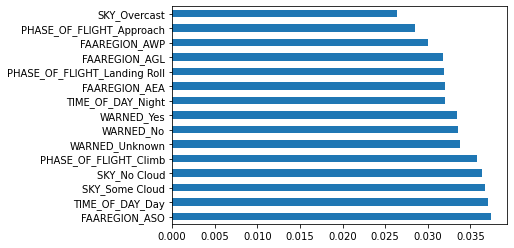

In [42]:
model = ExtraTreesClassifier()
model.fit(X,y)
# use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

FAAREGION_ASO has the highest score in terms of correct Indicated Damage prediction.

Random Forest Model

In [43]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set (70% training and 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [44]:
# Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
# Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [45]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6408296943231441


Train accuracy: 0.89
[[582 336]
 [322 592]]
              precision    recall  f1-score   support

           0       0.64      0.63      0.64       918
           1       0.64      0.65      0.64       914

    accuracy                           0.64      1832
   macro avg       0.64      0.64      0.64      1832
weighted avg       0.64      0.64      0.64      1832



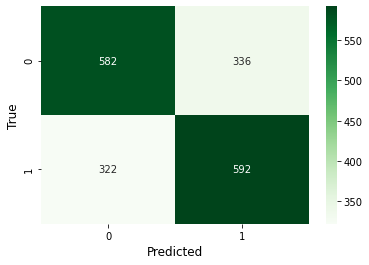

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 clf.predict(X_train)), 2))
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True, cmap='Greens', fmt='.0f')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
print(classification_report(y_test, y_pred))

Generating ROC curve.

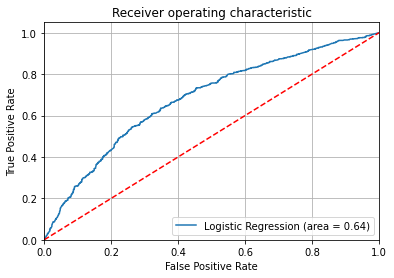

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.savefig('Log_ROC')
plt.show()

General results of Random Forest Model are moderately optimistic. 

## Run a Tree-based estimator

In [48]:
# Run a Tree-based estimators (i.e. decision trees & random forests)
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
Z = dtc.fit(X, y)

In [49]:
fi_col = []
fi = []

for i,column in enumerate(X):
    print('The feature importance for {} is : {}'.format(column, dtc.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dtc.feature_importances_[i])

The feature importance for EMA_1.0 is : 0.0023992134227677547
The feature importance for EMA_2.0 is : 0.0
The feature importance for EMA_7.0 is : 0.007022397177447008
The feature importance for EMA_9.0 is : 0.0022478367988704065
The feature importance for EMA_10.0 is : 0.0065953323678539216
The feature importance for EMA_11.0 is : 0.00407447982442206
The feature importance for EMA_13.0 is : 0.0
The feature importance for EMA_14.0 is : 0.0
The feature importance for EMA_18.0 is : 0.0
The feature importance for EMA_19.0 is : 0.006583287646261782
The feature importance for EMA_20.0 is : 0.0
The feature importance for EMA_22.0 is : 0.005739856455052832
The feature importance for EMA_23.0 is : 0.0018547130306143854
The feature importance for EMA_27.0 is : 0.0
The feature importance for EMA_29.0 is : 0.0
The feature importance for EMA_31.0 is : 0.017140946643890938
The feature importance for EMA_33.0 is : 0.0
The feature importance for EMA_34.0 is : 0.0031376022371393214
The feature importan

In [50]:
# Creating a Dataframe
fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()
# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:10]

fi_df.head(n = 50)

,index,Feature,Feature Importance
0,115,AC_MASS_4.0,0.122868
1,114,AC_MASS_3.0,0.096232
2,102,PHASE_OF_FLIGHT_Landing Roll,0.064232
3,99,PHASE_OF_FLIGHT_Climb,0.056415
4,25,EMO_01,0.054058
5,70,TIME_OF_DAY_Day,0.041486
6,105,PHASE_OF_FLIGHT_Take-off Run,0.028285
7,107,WARNED_No,0.027999
8,90,FAAREGION_AGL,0.026865
9,75,SKY_Some Cloud,0.025842


The best scores obtained for AC_MASS_3/4. Phases of flights seem to have sifnigicant importance.

# Logistic regression

In [ ]:
# Run a Tree-based estimators (i.e. decision trees & random forests)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
Z = dt.fit(x,y)

In [ ]:
fi_col = []
fi = []

for i,column in enumerate(x):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])
fi.sort()
fi  

In [104]:
# Creating a Dataframe
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:40]

fi_df.head(n = 50)

['TIME_OF_DAY_Dawn',
 'TIME_OF_DAY_Day',
 'TIME_OF_DAY_Dusk',
 'TIME_OF_DAY_Night',
 'SKY_No Cloud',
 'SKY_Overcast',
 'SKY_Some Cloud',
 'PRECIPITATION_Fog',
 'PRECIPITATION_Fog, None',
 'PRECIPITATION_Fog, Rain',
 'PRECIPITATION_Fog, Rain, Snow',
 'PRECIPITATION_Fog, Snow',
 'PRECIPITATION_None',
 'PRECIPITATION_None, Rain',
 'PRECIPITATION_None, Rain, Snow',
 'PRECIPITATION_None, Snow',
 'PRECIPITATION_Rain',
 'PRECIPITATION_Rain, Snow',
 'PRECIPITATION_Snow',
 'AC_MASS_1.0',
 'AC_MASS_2.0',
 'AC_MASS_3.0',
 'AC_MASS_4.0',
 'AC_MASS_5.0',
 'AC_CLASS_A',
 'AC_CLASS_B',
 'AC_CLASS_C',
 'AC_CLASS_J',
 'AC_CLASS_Y',
 'ENG_1_POS_1.0',
 'ENG_1_POS_2.0',
 'ENG_1_POS_3.0',
 'ENG_1_POS_4.0',
 'ENG_1_POS_5.0',
 'ENG_1_POS_6.0',
 'ENG_1_POS_7.0',
 'ENG_2_POS_1.0',
 'ENG_2_POS_2.0',
 'ENG_2_POS_3.0',
 'ENG_2_POS_4.0',
 'ENG_2_POS_5.0',
 'ENG_2_POS_6.0',
 'ENG_2_POS_7.0',
 'ENG_3_POS_1.0',
 'ENG_3_POS_3.0',
 'ENG_3_POS_4.0',
 'ENG_3_POS_5.0',
 'ENG_3_POS_6.0',
 'ENG_4_POS_1.0',
 'ENG_4_POS_3.0',

[0.000306976668186248,
 0.017593316932237403,
 0.0005814433378330306,
 0.012155196361966094,
 0.001145693534999234,
 0.0009829187240445391,
 0.0009744443453077214,
 0.0008601986367531263,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0029511724382308337,
 0.0,
 0.0,
 0.0,
 0.0004022093200736365,
 0.0,
 9.020108706952248e-05,
 0.014831823449685083,
 0.0011487969193644634,
 0.06740539146435726,
 0.10149732401904156,
 0.0003525296517356525,
 0.2013489640780418,
 0.0023149502031173616,
 0.0,
 0.0,
 0.0,
 0.001097545719765266,
 0.0,
 0.0,
 0.0014610751977510088,
 0.008297229288640028,
 0.0008017730332136552,
 0.004814449603580843,
 0.0034979490510001795,
 0.0,
 0.0,
 0.0004889615548880508,
 0.0007795373440751426,
 0.0014883115598509158,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0006039961207435985,
 0.0,
 0.0003721949237441146,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0011818098949128242,
 0.0011577808900067722,
 0.0003992753772130493,
 0.0,
 0.001032969392532354,
 0.00026603312099431075,
 0.0011858404880617367,
 0.0015292374661903922,
 

,Feature,Feature Importance
0,TIME_OF_DAY_Dawn,0.000307
1,TIME_OF_DAY_Day,0.017593
2,TIME_OF_DAY_Dusk,0.000581
3,TIME_OF_DAY_Night,0.012155
4,SKY_No Cloud,0.001146
...,...,...
79,LATITUDE,0.058413
80,LONGITUDE,0.021836
81,HEIGHT,0.198658
82,SPEED,0.025952


,index,Feature,Feature Importance
0,24,AC_CLASS_A,0.201349
1,81,HEIGHT,0.198658
2,78,INCIDENT_YEAR,0.103070
3,22,AC_MASS_4.0,0.101497
4,21,AC_MASS_3.0,0.067405
5,79,LATITUDE,0.058413
6,77,INCIDENT_MONTH,0.055905
7,82,SPEED,0.025952
8,80,LONGITUDE,0.021836
9,64,PHASE_OF_FLIGHT_Climb,0.018490


The best attributes for regression can be chosen from AC_CLASS/MASS and combined with height/speed and phase of flight.

In [105]:
X_train, X_valid, y_train, y_valid = train_test_split(x,
        y, train_size = 0.8, test_size=0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(204743, 84)
(63983, 137)
(51186, 84)


## Selecting initial columns for logistic regression.

In [243]:
X.columns

Index(['TIME_OF_DAY_Dawn', 'TIME_OF_DAY_Day', 'TIME_OF_DAY_Dusk',
       'TIME_OF_DAY_Night', 'SKY_No Cloud', 'SKY_Overcast', 'SKY_Some Cloud',
       'PRECIPITATION_Fog', 'PRECIPITATION_Fog, None',
       'PRECIPITATION_Fog, Rain',
       ...
       'PHASE_OF_FLIGHT_En Route', 'PHASE_OF_FLIGHT_Landing Roll',
       'PHASE_OF_FLIGHT_Local', 'PHASE_OF_FLIGHT_Parked',
       'PHASE_OF_FLIGHT_Take-off Run', 'PHASE_OF_FLIGHT_Taxi',
       'PHASE_OF_FLIGHT_Unknown', 'WARNED_No', 'WARNED_Unknown', 'WARNED_Yes'],
      dtype='object', length=103)

In [120]:
x = dat[['EMA_7.0', 'EMA_31.0', 'EMA_19.0', 'EMA_13.0', 'EMA_10.0',
         'TIME_OF_DAY_Dawn', 'TIME_OF_DAY_Day', 'TIME_OF_DAY_Dusk',
         'TIME_OF_DAY_Night', 'SKY_No Cloud', 'SKY_Overcast',
         'SKY_Some Cloud', 'AC_CLASS_A', 'AC_MASS_1.0', 'AC_MASS_2.0',
         'AC_MASS_4.0', 'WARNED_No', 'PHASE_OF_FLIGHT_Landing Roll', 
         'PHASE_OF_FLIGHT_Local', 'PHASE_OF_FLIGHT_Parked',
         'PHASE_OF_FLIGHT_Take-off Run', 'PHASE_OF_FLIGHT_Taxi', 
         'PRECIPITATION_None', ]]

In [121]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6106 entries, 94965 to 111355
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   EMA_7.0                       6106 non-null   uint8
 1   EMA_31.0                      6106 non-null   uint8
 2   EMA_19.0                      6106 non-null   uint8
 3   EMA_13.0                      6106 non-null   uint8
 4   EMA_10.0                      6106 non-null   uint8
 5   TIME_OF_DAY_Dawn              6106 non-null   uint8
 6   TIME_OF_DAY_Day               6106 non-null   uint8
 7   TIME_OF_DAY_Dusk              6106 non-null   uint8
 8   TIME_OF_DAY_Night             6106 non-null   uint8
 9   SKY_No Cloud                  6106 non-null   uint8
 10  SKY_Overcast                  6106 non-null   uint8
 11  SKY_Some Cloud                6106 non-null   uint8
 12  AC_CLASS_A                    6106 non-null   uint8
 13  PHASE_OF_FLIGHT_Landing Rol

Training and testing model.

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=0)
classifier = LogisticRegression(solver='lbfgs', max_iter=500, random_state=0)
classifier.fit(X_train, Y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False,
    fit_intercept=True, intercept_scaling=1, max_iter=500,
    multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
    solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
predicted_y = classifier.predict(X_test)
for x in range(len(predicted_y)):
    if (predicted_y[x] == 1):
        print(x, end="\t")

1	4	5	6	10	14	17	18	19	22	23	26	30	33	35	39	40	41	48	49	52	55	59	60	67	72	76	78	81	82	84	88	90	91	94	97	101	102	103	104	108	109	110	112	118	122	125	130	133	135	139	141	143	145	146	147	148	152	153	156	157	162	165	167	169	173	174	178	179	182	183	189	193	194	195	200	201	203	205	206	211	216	217	221	222	223	226	229	231	233	234	244	245	252	253	254	255	257	261	264	266	268	270	274	276	278	279	280	285	287	288	289	292	293	296	297	299	302	304	307	309	310	311	312	314	316	319	321	322	324	326	327	329	331	333	335	341	345	346	354	356	359	361	362	364	366	369	372	374	376	378	381	382	384	385	388	390	391	396	398	399	402	405	407	408	411	412	416	420	423	431	432	434	436	441	442	443	445	448	449	450	451	453	457	459	463	464	465	469	473	480	481	483	488	489	493	499	500	502	509	513	516	519	520	521	522	525	526	531	540	542	544	551	556	558	561	562	564	565	567	568	569	570	574	576	578	580	581	583	588	589	591	594	607	613	614	615	616	618	620	625	628	631	641	643	644	645	646	655	656	658	662	664	669	670	673	674	675	679	680	

Generating summary of model accuracy. 

Accuracy: 0.62
Train accuracy: 0.63
[[575 188]
 [391 373]]
              precision    recall  f1-score   support

           0       0.60      0.75      0.67       763
           1       0.66      0.49      0.56       764

    accuracy                           0.62      1527
   macro avg       0.63      0.62      0.61      1527
weighted avg       0.63      0.62      0.61      1527



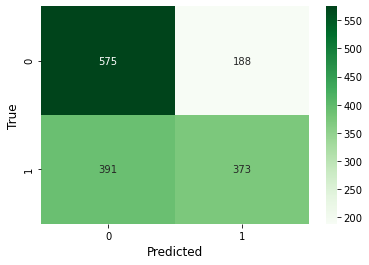

In [123]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#####
print('Accuracy: {:.2f}'.format(classifier.score(X_test, Y_test)))
from sklearn.metrics import accuracy_score
print("Train accuracy:", np.round(accuracy_score(Y_train, 
                                                 classifier.predict(X_train)), 2))
confusion_matrix = confusion_matrix(Y_test, predicted_y)
print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True, cmap='Greens', fmt='.0f')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

print(classification_report(Y_test, predicted_y))

Generating ROC curve.

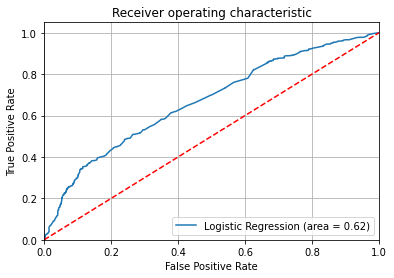

In [59]:
logit_roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.savefig('Log_ROC')
plt.show()